## Imports

In [1]:
import os
os.chdir("../")
%env CUDA_VISIBLE_DEVICES=0
%matplotlib inline

env: CUDA_VISIBLE_DEVICES=0


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
import data.data_selector as ds
import utils.data_processing as dp
import utils.plot_functions as pf
import analysis.analysis_picker as ap

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
class analysis_params(object):
  model_type = "gdn_autoencoder"
  model_name = "gdn_autoencoder"
  version = "1.0"
  save_info = "analysis"
  overwrite_analysis = False

# Computed params
analysis_params.model_dir = (os.path.expanduser("~")+"/Work/Projects/"+analysis_params.model_name+"_bkp")

In [4]:
analyzer = ap.get_analyzer(analysis_params)
analyzer.model.setup(analyzer.model_params)
analyzer.load_analysis(save_info=analysis_params.save_info)

AttributeError: type object 'analysis_params' has no attribute 'lower'

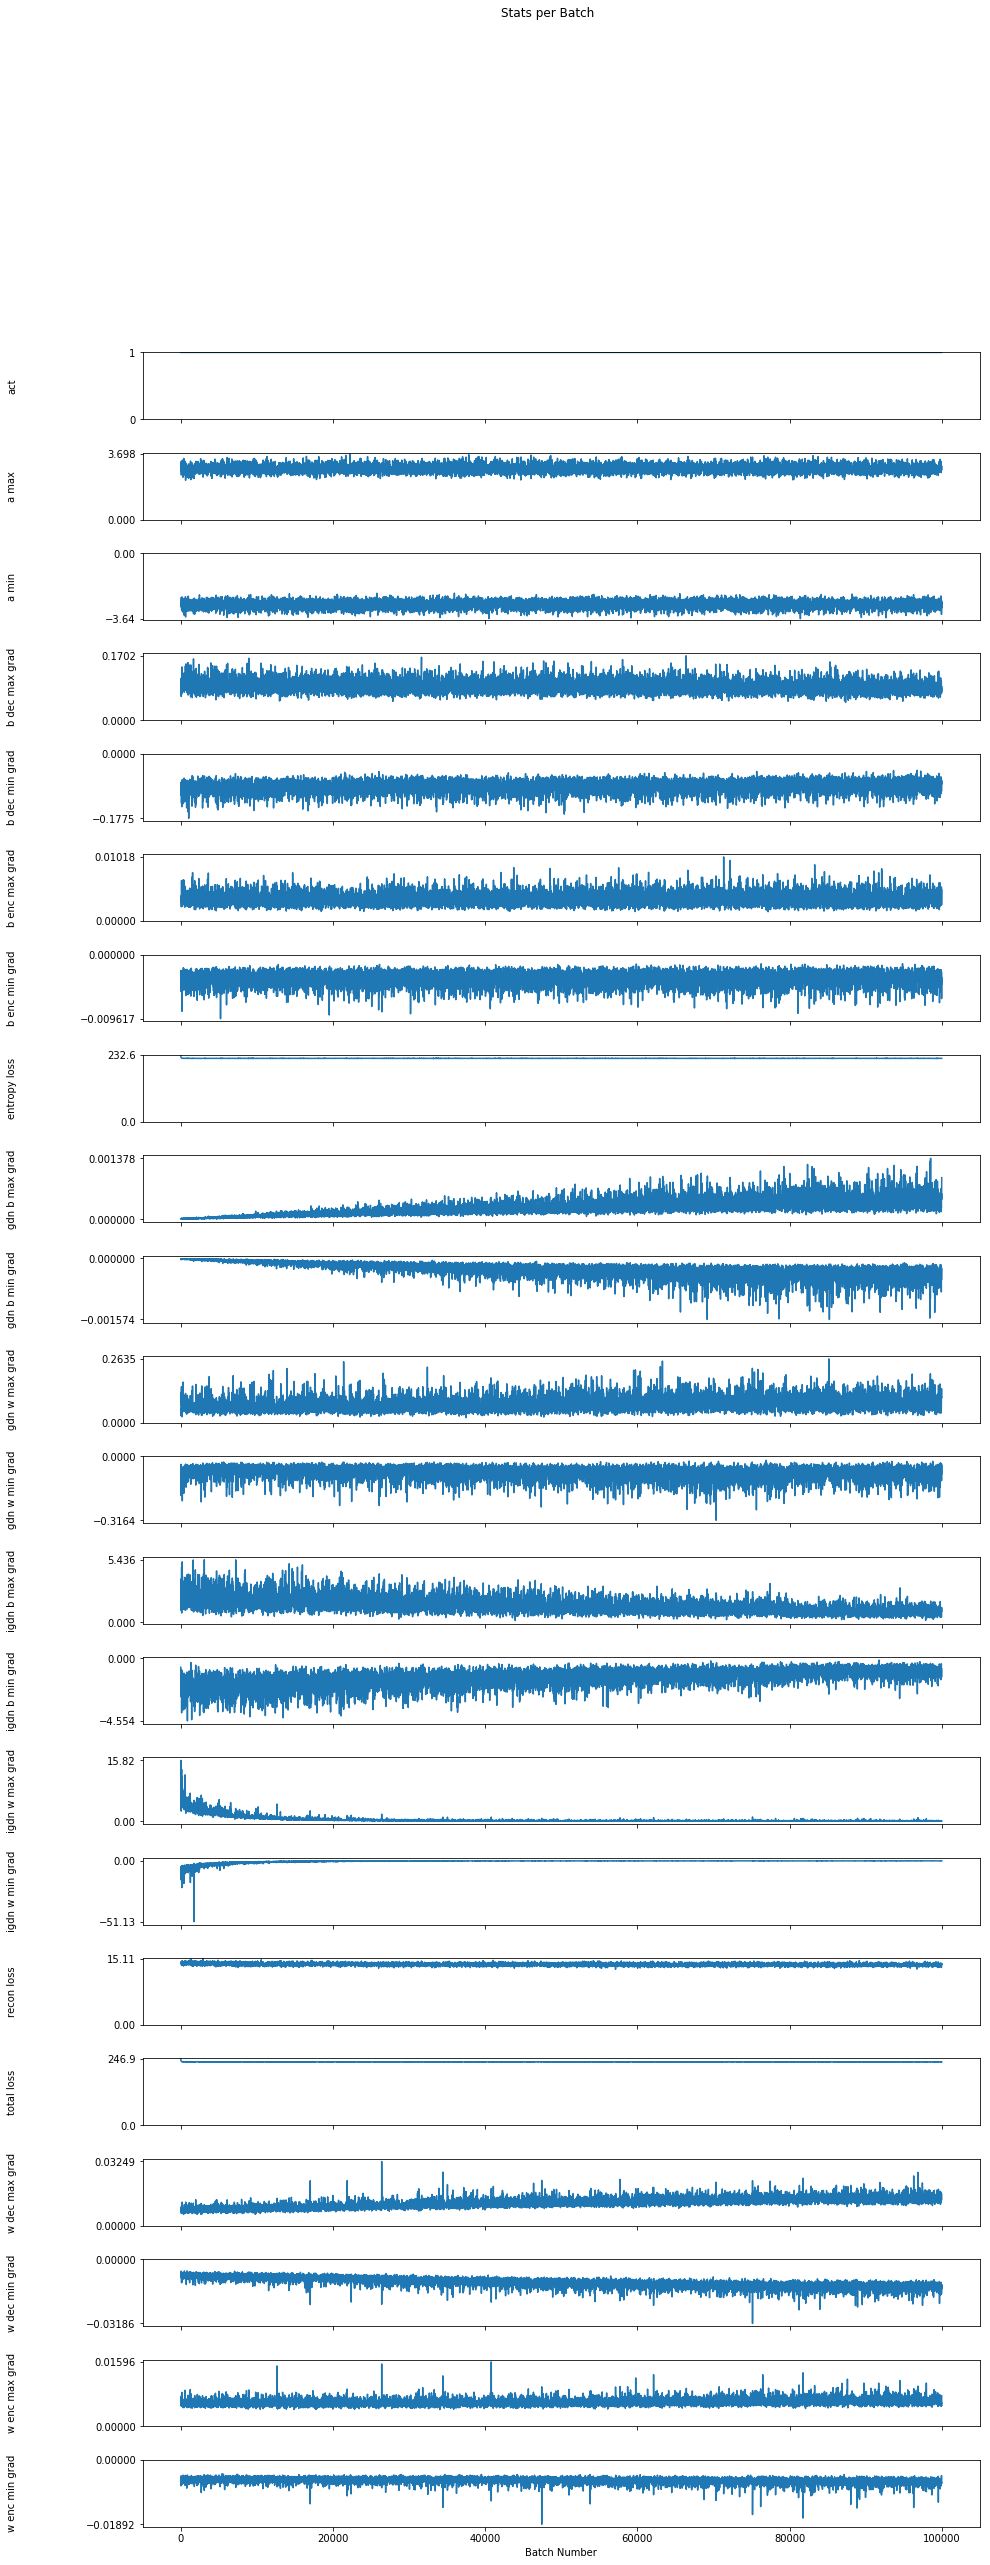

In [17]:
keys=["a_fraction_active",
  "a_max",
  "a_min",
  "b_dec_max_grad",
  "b_dec_min_grad",
  "b_enc_max_grad",
  "b_enc_min_grad",
  "entropy_loss",
  "gdn_b_max_grad",
  "gdn_b_min_grad",
  "gdn_w_max_grad",
  "gdn_w_min_grad",
  "igdn_b_max_grad",
  "igdn_b_min_grad",
  "igdn_w_max_grad",
  "igdn_w_min_grad",
  "recon_loss",
  "total_loss",
  "w_dec_max_grad",
  "w_dec_min_grad",
  "w_enc_max_grad",
  "w_enc_min_grad"]

labels=["act",
  "a max",
  "a min",
  "b dec max grad",
  "b dec min grad",
  "b enc max grad",
  "b enc min grad",
  "entropy loss",
  "gdn b max grad",
  "gdn b min grad",
  "gdn w max grad",
  "gdn w min grad",
  "igdn b max grad",
  "igdn b min grad",
  "igdn w max grad",
  "igdn w min grad",
  "recon loss",
  "total loss",
  "w dec max grad",
  "w dec min grad",
  "w enc max grad",
  "w enc min grad"]

stats_fig = pf.plot_stats(analyzer.run_stats, keys=keys, labels=labels, figsize=(15,40))
#stats_fig.savefig(analyzer.analysis_out_dir+analysis_params["model_name"]+"_train_stats.png")

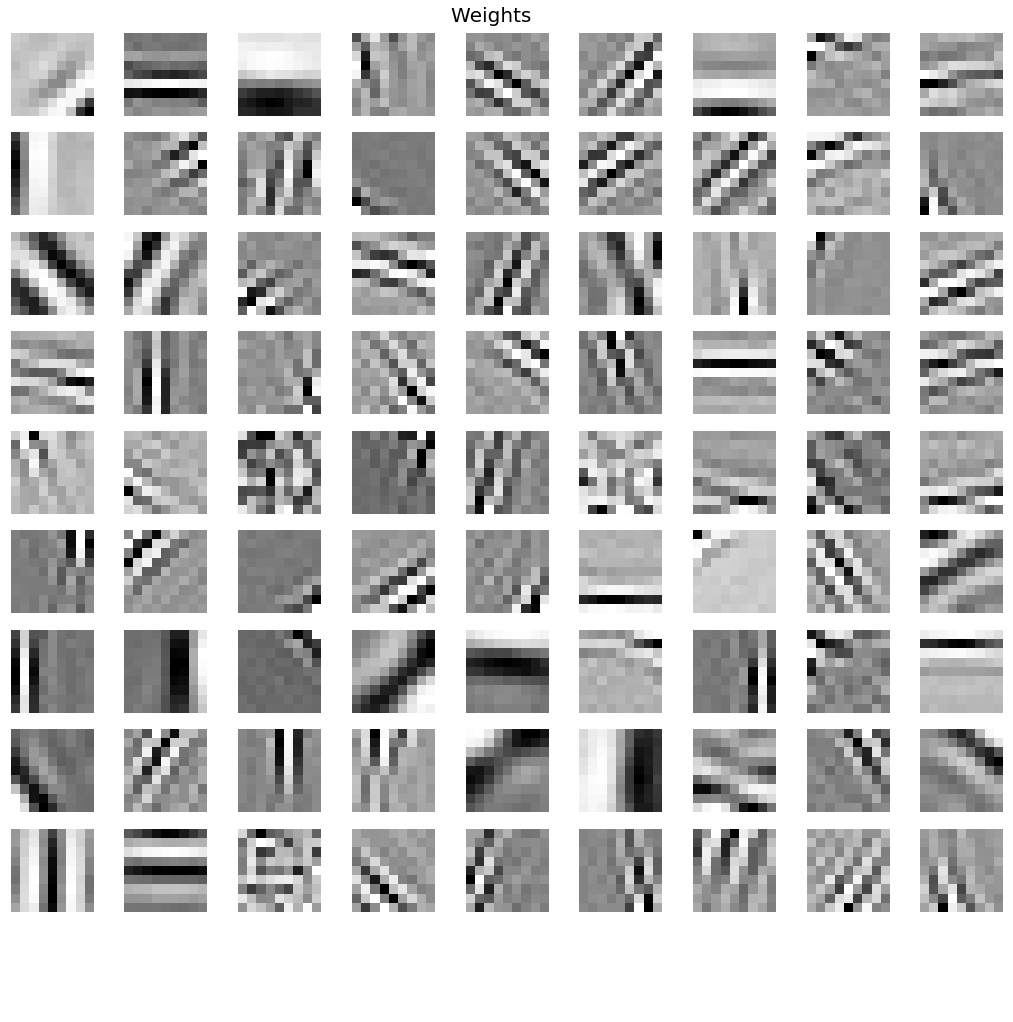

In [18]:
weight_shape = [analyzer.bf_stats["num_outputs"], analyzer.bf_stats["patch_edge_size"], analyzer.bf_stats["patch_edge_size"]]
dict_fig = pf.plot_weights(analyzer.evals["weights/w_enc:0"].T.reshape(weight_shape), title="Weights")
dict_fig.savefig(analyzer.analysis_out_dir+analysis_params["model_name"]+"_dict.png")

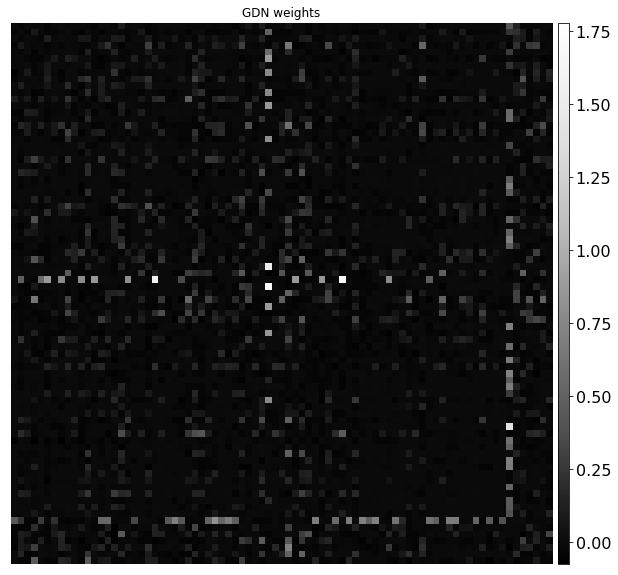

In [19]:
gdn_weights = analyzer.evals['weights/gdn_w:0']
fig, ax = plt.subplots(1, 1, figsize=(10,10))
im = ax.imshow(gdn_weights, vmin=np.min(gdn_weights), vmax=np.max(gdn_weights), cmap="Greys_r")
ax.set_title("GDN weights")
pf.clear_axis(ax)
pf.add_colorbar_to_im(im, aspect=50)
plt.show()

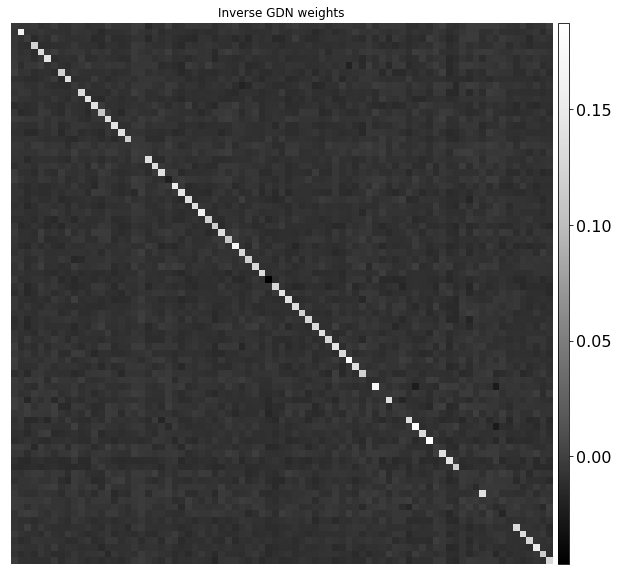

In [20]:
gdn_weights = analyzer.evals['weights/igdn_w:0']
fig, ax = plt.subplots(1, 1, figsize=(10,10))
im = ax.imshow(gdn_weights, vmin=np.min(gdn_weights), vmax=np.max(gdn_weights), cmap="Greys_r")
ax.set_title("Inverse GDN weights")
pf.clear_axis(ax)
pf.add_colorbar_to_im(im, aspect=50)
plt.show()